In [1]:
import pandas as pd

# 加载数据文件
edges_df = pd.read_csv('../data/InputFileEdges.csv')
nodes_df = pd.read_csv('../data/InputFileNodes.csv')

# 显示数据的前几行
print(edges_df.head())
print(nodes_df.head())


  from   to  weight       type
0  s01  s02      10  hyperlink
1  s01  s02      12  hyperlink
2  s01  s03      22  hyperlink
3  s01  s04      21  hyperlink
4  s04  s11      22    mention
    id                media  media.type type.label  audience.size
0  s01             NY Times           1  Newspaper             20
1  s02      Washington Post           1  Newspaper             25
2  s03  Wall Street Journal           1  Newspaper             30
3  s04            USA Today           1  Newspaper             32
4  s05             LA Times           1  Newspaper             20


In [5]:
# 将节点属性合并到边数据中
edges_df = edges_df.merge(nodes_df, left_on='from', right_on='id', suffixes=('', '_from'))
edges_df = edges_df.merge(nodes_df, left_on='to', right_on='id', suffixes=('', '_to'))

# 删除不必要的列
edges_df = edges_df.drop(columns=['id', 'id_to'])

# 显示合并后的数据
print(edges_df.head())


  from   to  weight       type      media  media.type type.label  \
0  s01  s02      10  hyperlink   NY Times           1  Newspaper   
1  s01  s02      12  hyperlink   NY Times           1  Newspaper   
2  s05  s02      21  hyperlink   LA Times           1  Newspaper   
3  s01  s03      22  hyperlink   NY Times           1  Newspaper   
4  s04  s03      23  hyperlink  USA Today           1  Newspaper   

   audience.size             media_to  media.type_to type.label_to  \
0             20      Washington Post              1     Newspaper   
1             20      Washington Post              1     Newspaper   
2             20      Washington Post              1     Newspaper   
3             20  Wall Street Journal              1     Newspaper   
4             32  Wall Street Journal              1     Newspaper   

   audience.size_to  
0                25  
1                25  
2                25  
3                30  
4                30  


In [7]:
# 选择数值列
numeric_df = edges_df.select_dtypes(include=['number'])

# 计算相关性矩阵
correlation_matrix = numeric_df.corr()

# 提取与信息扩散速度（weight）的相关性
correlation_with_weight = correlation_matrix['weight'].sort_values(ascending=False)

# 显示相关性
print(correlation_with_weight)



weight              1.000000
media.type_to       0.123561
audience.size       0.111683
media.type         -0.013129
audience.size_to   -0.202646
Name: weight, dtype: float64


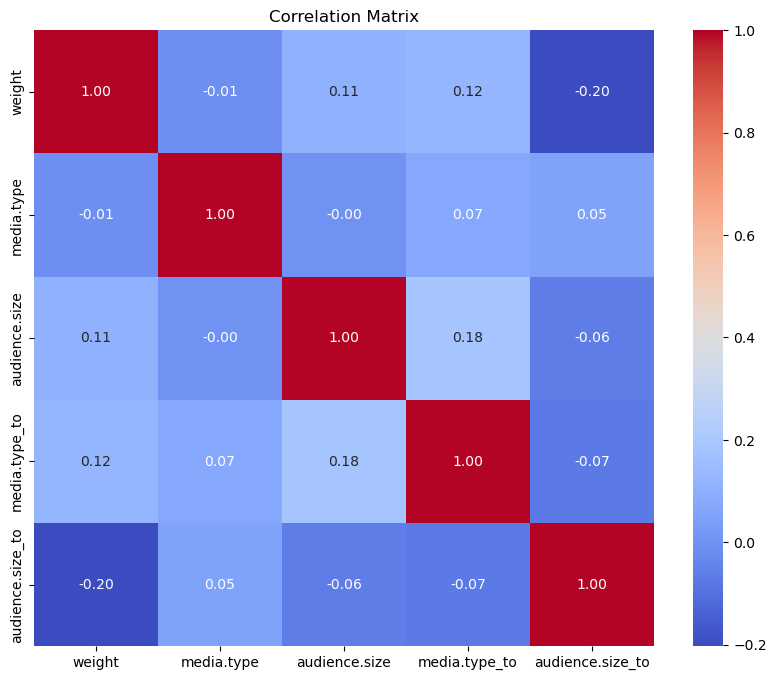

In [8]:
import seaborn as sns
import matplotlib.pyplot as plt

# 绘制相关性热图
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix')
plt.show()
